# Importing libraries and loading the data

First we'll import the necessary modules for our cleaning, visualizations, and analyses as well as loading the scraped twitter and reddit data

In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import emoji
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import get_tweets
import nltk
from plotnine import *
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
# Used to ignore warnings to clean up the notebook
warnings.filterwarnings('ignore')

%matplotlib inline

ModuleNotFoundError: No module named 'plotnine'

In [2]:
# Loading the twitter data

# The twitter data was cleaned slightly when loaded using functions in the get_tweets.py module
tweets_conservative  = pd.read_csv("data/conservative.csv")
# Filtering down to English language only tweets
tweets_conservative = tweets_conservative[tweets_conservative.lang == "en"]
# Removing duplicate tweet texts (retweets)
tweets_conservative.drop_duplicates('text', inplace=True)

tweets_liberal  = pd.read_csv("data/liberal.csv")
# Filtering down to English language only tweets
tweets_liberal = tweets_liberal[tweets_liberal.lang == "en"]
# Removing duplicate tweet texts (retweets)
tweets_liberal.drop_duplicates('text', inplace=True)


# Loading the reddit data
reddit_cons = pd.read_csv('data/reddit-Conservative.csv')
reddit_lib = pd.read_csv('data/reddit-Liberal.csv')

# Liberal subreddit

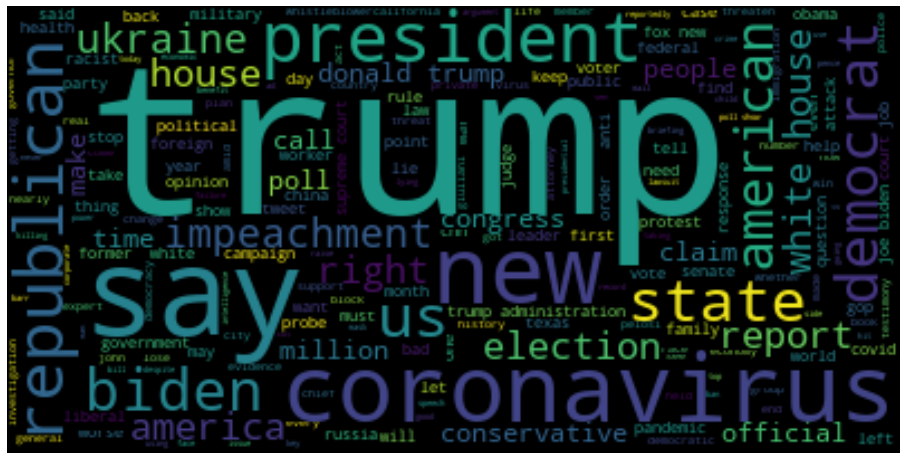

In [3]:
# This section will show plots for the Reddit data that helped lead us to our choice of twitter search words

headlines = ' '.join(reddit_lib.title.to_list()).lower()
wordcloud = WordCloud().generate(headlines)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Conservative subreddit

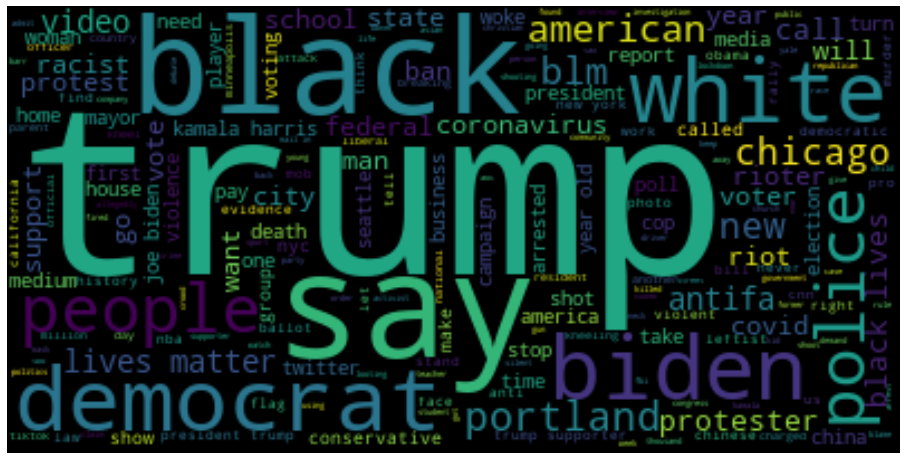

In [4]:
headlines = ' '.join(reddit_cons.title.to_list()).lower()
wordcloud = WordCloud().generate(headlines)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

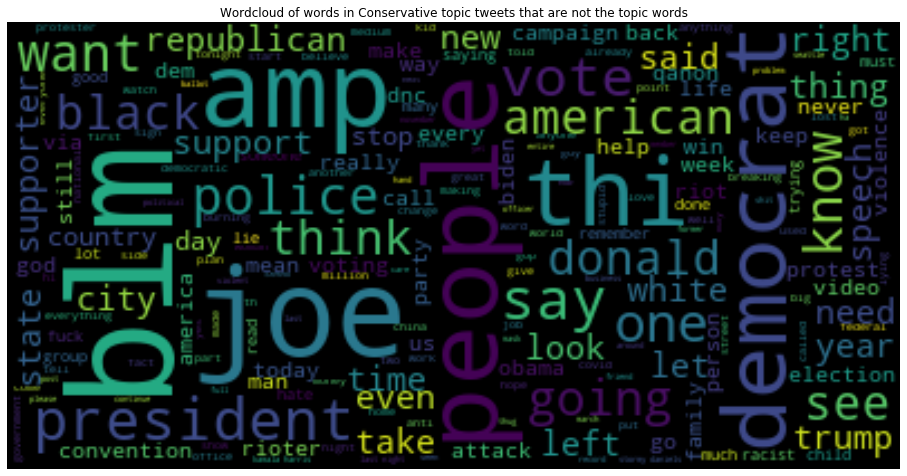

In [5]:
# This section will do some data clean up and EDA for the twitter data

conservative = tweets_conservative.copy()
# This function cleans the tweets of RT's, user mentions, expands contractions, and removes stopwords
conservative_clean = get_tweets.clean_tweets(conservative)

our_tweets = ' '.join(conservative_clean['text'].to_list()).lower()
# Removing the topic words from the string
clean_tweets = ' '.join(x for x in our_tweets.split(" ") if x.lower() not in conservative_clean.topic.unique() or x.lower() == 'blm')
wordcloud = WordCloud().generate(clean_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of words in Conservative topic tweets that are not the topic words")

plt.show()

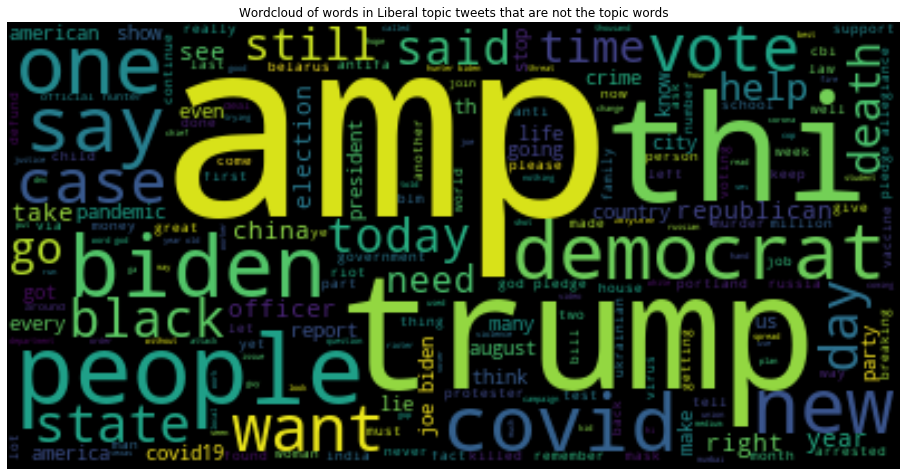

In [6]:
# This section will do some data clean up and EDA for the twitter data

liberal = tweets_liberal.copy()
# This function cleans the tweets of RT's, user mentions, expands contractions, and removes stopwords
liberal_clean = get_tweets.clean_tweets(liberal)

our_tweets = ' '.join(liberal_clean['text'].to_list()).lower()
# Removing the topic words from the string
clean_tweets = ' '.join(x for x in our_tweets.split(" ") if x.lower() not in liberal_clean.topic.unique())
wordcloud = WordCloud().generate(clean_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud of words in Liberal topic tweets that are not the topic words")

plt.show()

# Sentiment analysis of twitter data

The package we're using for sentiment analysis, VADER, does not require stopwords to be removed. It actually prefers them to be left in in order to better calculate full sentence sentiment

In [7]:
contweets = tweets_conservative[["topic","text","created_at","retweet_count"]]
contweets.created_at = pd.to_datetime(contweets.created_at)

libtweets = tweets_liberal[["topic","text","created_at","retweet_count"]]
libtweets.created_at = pd.to_datetime(libtweets.created_at)

In [8]:
# Function for calculation tweet sentiment
def sentscores(sentence):
    score = analyser.polarity_scores(sentence)
    return score["compound"]

In [9]:
# Calculating sentiment scores as new column
analyser = SentimentIntensityAnalyzer()
contweets["score"] = contweets.text.apply(sentscores)
libtweets["score"] = libtweets.text.apply(sentscores)

In [10]:
# Printing sample of sentiment text
contweets.sample(10)

,topic,text,created_at,retweet_count,score
1423,biden,@atensnut She's a joke. Biden gets a pass from...,2020-08-22 14:52:11+00:00,0,0.2960
2429,BLM,RT @WallofVetsFL: Commitment March Aug 28th WA...,2020-08-22 14:50:49+00:00,23,0.4389
1487,biden,RT @BillOReilly: Senator Harris says she and J...,2020-08-22 14:52:08+00:00,3617,0.7579
2871,BLM,"@LepapillonBlu Nope, I’ll happily where my #BL...",2020-08-22 14:48:40+00:00,0,-0.1088
617,trump,@X22Report When we vote out Trump we #VoteOutH...,2020-08-22 14:52:13+00:00,0,0.0000
1844,biden,"RT @JStormogipson: @ChrisMurphyCT ""Character i...",2020-08-22 14:51:50+00:00,20,0.4588
3689,antifa,RT @White2to4: He’s too busy kicking ANTIFA an...,2020-08-22 14:47:08+00:00,363,-0.6239
2422,BLM,RT @JuliansRum: The MSM will finally start cov...,2020-08-22 14:50:50+00:00,629,-0.3716
1983,biden,RT @DineshDSouza: “Light is more powerful than...,2020-08-22 14:51:42+00:00,2269,0.3367
831,trump,RT @Alyssa_Milano: “To weak to lead.” \n\nTrum...,2020-08-22 14:52:08+00:00,11942,-0.7650


In [11]:
# Printing sample of sentiment text
libtweets.sample(10)

,topic,text,created_at,retweet_count,score
4485,protest,RT @Doranimated: Some of those people at the P...,2020-08-22 14:52:22+00:00,12,0.0240
686,coronavirus,Internet data caps expire for two providers in...,2020-08-22 14:51:45+00:00,0,0.0000
4039,protest,RT @NAN_DINI_: Fantastical excuses why Kashmir...,2020-08-22 14:53:16+00:00,146,-0.1280
1906,democrats,RT @marwilliamson: A basic fundamental problem...,2020-08-22 14:51:42+00:00,831,-0.4019
3940,police,RT @RealProfTwatter: If only the Police would ...,2020-08-22 14:52:00+00:00,229,0.4019
3712,police,RT @Nitin_S20: @blacksheep_119 @PratiB28 Tempe...,2020-08-22 14:52:19+00:00,5,0.0000
138,coronavirus,RT @tripgabriel: Alternatively the DNC respect...,2020-08-22 14:52:43+00:00,206,0.4767
4139,protest,RT @IngrahamAngle: These threats show us what ...,2020-08-22 14:53:04+00:00,1262,-0.4939
2097,ukraine,@ACTBrigitte gained millions from Ukraine,2020-08-22 14:48:41+00:00,0,0.3818
1198,democrats,Disgusting!! My nurse friend in Corpus Christi...,2020-08-22 14:52:45+00:00,0,0.6784


In [12]:
libtweets.groupby("topic").mean()

,retweet_count,score
topic,,
coronavirus,1094.663743,-0.033927
democrats,1775.526961,-0.035853
police,1015.594320,-0.182297
protest,890.102326,-0.142390
ukraine,227.115942,-0.033992


In [13]:
contweets.groupby("topic").mean()

,retweet_count,score
topic,,
BLM,644.437853,-0.060884
antifa,450.162162,-0.152269
biden,1157.496957,0.025244
portland,574.574899,-0.147702
trump,920.454407,-0.036268


In [14]:
# Concatenating group sentiment averages for plotting

con_sent = contweets.groupby("topic").mean()
con_sent['type'] = "Conservative"
lib_sent = libtweets.groupby("topic").mean()
lib_sent['type'] = "Liberal"


full_sens = pd.concat([con_sent, lib_sent])
full_sens['topic'] = full_sens.index

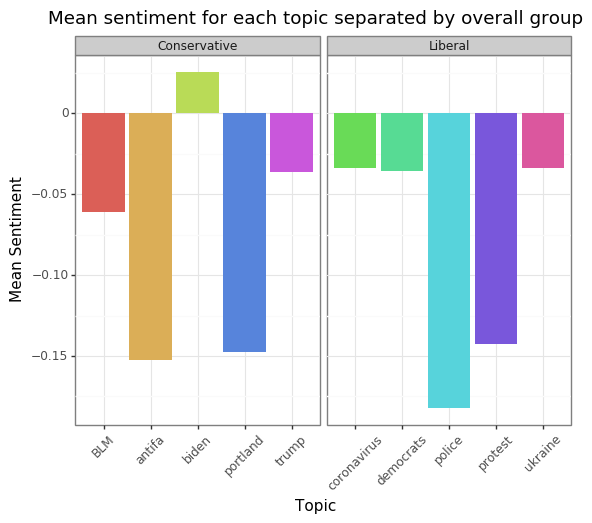

<ggplot: (8783220767841)>

In [15]:
(ggplot(full_sens, aes(x = 'topic', y = 'score', fill = 'topic')) + 
    geom_bar(stat = 'identity') + 
    facet_wrap(['type'], scales = "free_x") + 
    theme_bw() +
    theme(axis_text_x = element_text(angle=45)) + 
    guides(fill = False) + 
    labs(x = "Topic", y = "Mean Sentiment", title="Mean sentiment for each topic separated by overall group"))

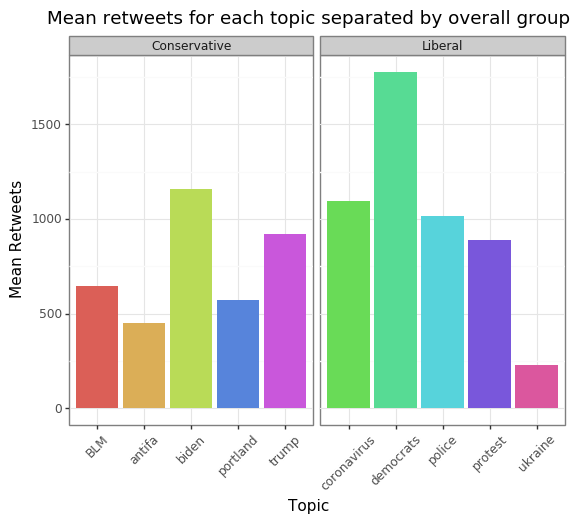

<ggplot: (8783220596873)>

In [16]:
(ggplot(full_sens, aes(x = 'topic', y = 'retweet_count', fill = 'topic')) + 
    geom_bar(stat = 'identity') + 
    facet_wrap(['type'], scales = "free_x") + 
    theme_bw() +
    theme(axis_text_x = element_text(angle=45)) + 
    guides(fill = False) + 
    labs(x = "Topic", y = "Mean Retweets", title="Mean retweets for each topic separated by overall group"))